<a href="https://colab.research.google.com/github/tuhinbiswas24/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import  XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

# **Data Collection and Processing**

In [ ]:
# Loading the Csv
heart_data = pd.read_csv('heart.csv')

In [ ]:
# Print the first 5 example
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
heart_data.shape

(1025, 14)

In [ ]:
# Print the last 5 example
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# Number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Checking for missing  value
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of the target variable
heart_data["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

# **Splitting the Features and Target**

In [ ]:
X = heart_data.drop(columns = "target", axis=1)
Y= heart_data["target"]

In [ ]:
X.shape

(1025, 13)

In [ ]:
Y.shape

(1025,)

# **Splitting the data into training and data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X.shape, X_train.shape, X_test.shape

((1025, 13), (820, 13), (205, 13))

In [ ]:
Y.shape, y_train.shape, y_test.shape

((1025,), (820,), (205,))

# **Model Training**

# **Logistic Regression**

In [ ]:
m1="Logistic Regression"
lr_model = LogisticRegression(solver="liblinear",random_state=2 )
# training the model with training data
lr_model.fit(X_train, y_train)
# Accuracy on training data
X_train_prediction = lr_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_prediction = lr_model.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_lr*100)

#Confussion matrix
LR_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(LR_conf_matrix)

Accuracy on Training data:  85.85365853658537
Accuracy on Test data:  80.48780487804879
Confussion matrix
[[73 27]
 [13 92]]


# **Naive Bayes**

In [ ]:
m2="Naive Bayes"
nb = GaussianNB()
# training the model with training data
nb.fit(X_train,y_train)
# Accuracy on training data
X_train_prediction = nb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_prediction = nb.predict(X_test)
test_data_accuracy_nb = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_nb*100)

#Confussion matrix
nb_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(nb_conf_matrix)

Accuracy on Training data:  83.90243902439025
Accuracy on Test data:  78.04878048780488
Confussion matrix
[[75 25]
 [20 85]]


# **Random Forest**

In [ ]:
m3="Random Forest"
rf = RandomForestClassifier(n_estimators=100, criterion="entropy",max_depth=7, min_samples_leaf=2, max_features="sqrt",random_state=2)
# training the model with training data
rf.fit(X_train,y_train)
# Accuracy on training data
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)

# Accuracy on test data
X_test_prediction = rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_rf*100)

#Confussion matrix
rf_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(rf_conf_matrix)

Accuracy on Training data:  99.51219512195122
Accuracy on Test data:  100.0
Confussion matrix
[[100   0]
 [  0 105]]


# **Extreme Gradient Boost**

In [ ]:
m4="Extreme Gradient Boost"
Egb = GradientBoostingClassifier(n_estimators=100, subsample= 0.2, min_samples_leaf=2,max_depth=5,random_state=2,max_features="sqrt")
# training the model with training data
Egb.fit(X_train,y_train)
# Accuracy on training data
X_train_prediction = Egb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_prediction = Egb.predict(X_test)
test_data_accuracy_egb = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_egb*100)

#Confussion matrix
Egb_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(Egb_conf_matrix)

Accuracy on Training data:  100.0
Accuracy on Test data:  100.0
Confussion matrix
[[100   0]
 [  0 105]]


# **K-Neighbour**

In [ ]:
m5="K-Neighbour"
knn = KNeighborsClassifier(n_neighbors=20, algorithm="auto" )
# train on the training set
knn.fit(X_train, y_train)
# Accuracy on training data
X_train_predict= knn.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= knn.predict(X_test)
test_data_accuracy_knn=accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_knn*100)

#Confussion matrix
knn_confusion_matrix=  confusion_matrix(y_test,X_test_predict)
print("Confusion Matrix")
print(knn_confusion_matrix)

Accuracy on Training data:  85.73170731707317
Accuracy on Test data:  81.46341463414633
Confusion Matrix
[[82 18]
 [20 85]]


# **XGB**

In [ ]:
m6="XGB"
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
# Accuracy on training data
X_train_predict= xgb.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= xgb.predict(X_test)
test_data_accuracy_xgb=accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_xgb*100)
#Confussion matrix
knn_confusion_matrix=  confusion_matrix(y_test,X_test_predict)
print("Confusion Matrix")
print(knn_confusion_matrix)

Accuracy on Training data:  100.0
Accuracy on Test data:  100.0
Confusion Matrix
[[100   0]
 [  0 105]]


# **SVC**

In [ ]:
m7="svc"
svc = SVC(C=5,kernel="rbf")
svc.fit(X_train, y_train)
# Accuracy on training data
X_train_predict= svc.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= svc.predict(X_test)
test_data_accuracy_svc=accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_svc*100)
#Confussion matrix
knn_confusion_matrix =  confusion_matrix(y_test,X_test_predict)
print("Confusion Matrix")
print(knn_confusion_matrix)

Accuracy on Training data:  98.65853658536585
Accuracy on Test data:  98.04878048780488
Confusion Matrix
[[ 98   2]
 [  2 103]]


# **Results**

In [ ]:
results = {"Models": [m1, m2, m3 ,m4, m5, m6,m7],
           "Accuracy": [test_data_accuracy_lr, test_data_accuracy_nb, test_data_accuracy_rf,test_data_accuracy_egb, test_data_accuracy_knn, test_data_accuracy_xgb, test_data_accuracy_svc]}

for (key, value) in results.items():
    if key=="Accuracy":
        results[key]=  [item*100 for item in results[key]]


result_df=pd.DataFrame(results)

In [ ]:
result_df

,Models,Accuracy
0,Logistic Regression,80.487805
1,Naive Bayes,78.048780
2,Random Forest,100.000000
3,Extreme Gradient Boost,100.000000
4,K-Neighbour,81.463415
5,XGB,100.000000
6,svc,98.048780


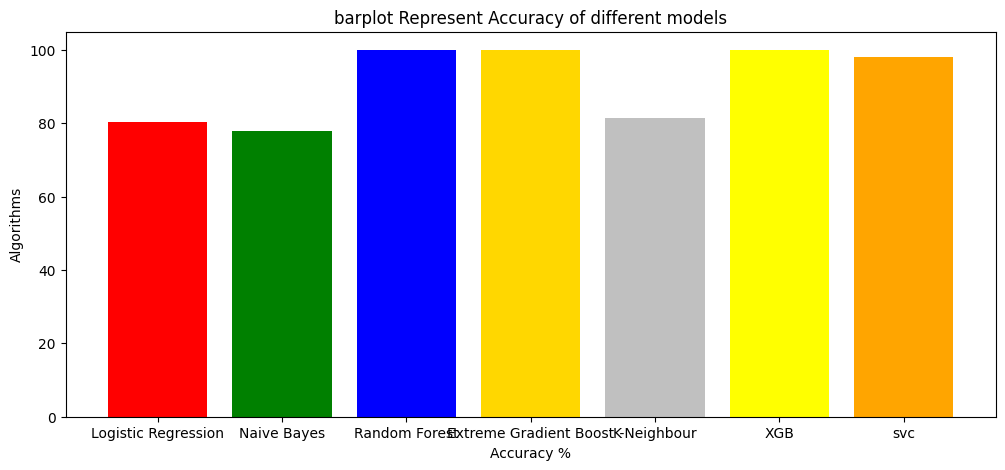

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(result_df['Models'],result_df['Accuracy'],color = colors)
plt.show()